# Import Libraries and Date set #

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
file = 'bengaluru_house_prices.csv'
df = pd.read_csv(file)
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [47]:
# Checking Non Null Count and Data Type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [48]:
# Describing Data set 
df.describe(include = 'all')

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
count,13320,13320,13319,13304,7818,13320,13247.000000,12711.000000,13320.000000
unique,4,81,1305,31,2688,2117,NaN,NaN,NaN
top,Super built-up Area,Ready To Move,Whitefield,2 BHK,GrrvaGr,1200,NaN,NaN,NaN
freq,8790,10581,540,5199,80,843,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,2.692610,1.584376,112.565627
std,NaN,NaN,NaN,NaN,NaN,NaN,1.341458,0.817263,148.971674
min,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,8.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,1.000000,50.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,2.000000,72.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,2.000000,120.000000


In [49]:
# Checking if there is any duplicate values
duplicate = df.duplicated().sum()
duplicate

529

In [50]:
df[df.duplicated()]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
971,Super built-up Area,Ready To Move,Haralur Road,3 BHK,NRowse,1464,3.0,2.0,56.0
1115,Super built-up Area,Ready To Move,Haralur Road,2 BHK,NaN,1027,2.0,2.0,44.0
1143,Super built-up Area,Ready To Move,Vittasandra,2 BHK,Prlla C,1246,2.0,1.0,64.5
1290,Super built-up Area,Ready To Move,Haralur Road,2 BHK,NaN,1194,2.0,2.0,47.0
1394,Super built-up Area,Ready To Move,Haralur Road,2 BHK,NaN,1027,2.0,2.0,44.0
...,...,...,...,...,...,...,...,...,...
13285,Super built-up Area,Ready To Move,VHBCS Layout,2 BHK,OlarkLa,1353,2.0,2.0,110.0
13299,Super built-up Area,18-Dec,Whitefield,4 BHK,Prtates,2830 - 2882,5.0,0.0,154.5
13311,Plot Area,Ready To Move,Ramamurthy Nagar,7 Bedroom,NaN,1500,9.0,2.0,250.0
13313,Super built-up Area,Ready To Move,Uttarahalli,3 BHK,Aklia R,1345,2.0,1.0,57.0



# Data Cleaning #

In [51]:
#Remove duplicate rows from table
df1=df.drop_duplicates()
df1

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13314,Super built-up Area,Ready To Move,Green Glen Layout,3 BHK,SoosePr,1715,3.0,3.0,112.00
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00


In [52]:
# Checking if there is any missing Data
missing_value = df1.isnull().sum()
missing_value

area_type          0
availability       0
location           1
size              16
society         5328
total_sqft         0
bath              73
balcony          605
price              0
dtype: int64

In [53]:
# Display the empty value in location column
df1[pd.isnull(df1['location'])]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
568,Super built-up Area,Ready To Move,NaN,3 BHK,Grare S,1600,3.0,2.0,86.0


In [54]:
# Checking most repeated value of location column 
df1['location'].mode()

0    Whitefield
Name: location, dtype: object

In [55]:
# Replacing most repeated value = Whitefield to empty location column
df1['location']=df1['location'].fillna('Whitefield')

C:\Users\Kiran\AppData\Local\Temp\ipykernel_20364\954297843.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['location']=df1['location'].fillna('Whitefield')


In [56]:
# Display the empty value in size column
df1[pd.isnull(df1['size'])]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
579,Plot Area,Immediate Possession,Sarjapur Road,NaN,Asiss B,1200 - 2400,NaN,NaN,34.185
1775,Plot Area,Immediate Possession,IVC Road,NaN,Orana N,2000 - 5634,NaN,NaN,124.000
2264,Plot Area,Immediate Possession,Banashankari,NaN,NaN,2400,NaN,NaN,460.000
2809,Plot Area,Immediate Possession,Sarjapur Road,NaN,AsdiaAr,1200 - 2400,NaN,NaN,28.785
2862,Plot Area,Immediate Possession,Devanahalli,NaN,Ajleyor,1500 - 2400,NaN,NaN,46.800
5333,Plot Area,Immediate Possession,Devanahalli,NaN,Emngs S,2100 - 5405,NaN,NaN,177.115
6423,Plot Area,Immediate Possession,Whitefield,NaN,SRniaGa,2324,NaN,NaN,26.730
6636,Plot Area,Immediate Possession,Jigani,NaN,S2enste,1500,NaN,NaN,25.490
6719,Plot Area,Immediate Possession,Hoskote,NaN,SJowsn,800 - 2660,NaN,NaN,28.545
7680,Plot Area,Immediate Possession,Kasavanhalli,NaN,NaN,5000,NaN,NaN,400.000


In [57]:
# Checking most repeated value of size column
df1['size'].mode()

0    2 BHK
Name: size, dtype: object

In [58]:
# Replacing most repeated value = 2 BHK to empty size column
df1['size']=df1['size'].fillna('2 BHK')

C:\Users\Kiran\AppData\Local\Temp\ipykernel_20364\1653768320.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['size']=df1['size'].fillna('2 BHK')


In [59]:
# Analysing the size for proper seperation
df1['size'].value_counts()

size
2 BHK         4947
3 BHK         4120
4 Bedroom      824
4 BHK          574
3 Bedroom      535
1 BHK          521
2 Bedroom      314
5 Bedroom      291
6 Bedroom      191
1 Bedroom      104
8 Bedroom       84
7 Bedroom       82
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom       1
16 BHK           1
19 BHK           1
18 Bedroom       1
Name: count, dtype: int64

In [60]:
# Seperating size to BHK size and convert to integer
df1['bhk_size'] = df1['size'].str.split().str.get(0).astype(int)

C:\Users\Kiran\AppData\Local\Temp\ipykernel_20364\3246666646.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['bhk_size'] = df1['size'].str.split().str.get(0).astype(int)


In [61]:
# Display the empty value in bath column
df1[pd.isnull(df1['bath'])]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,bhk_size
56,Built-up Area,20-Feb,Devanahalli,4 Bedroom,BrereAt,3010 - 3410,NaN,NaN,192.000,4
81,Built-up Area,18-Oct,Hennur Road,4 Bedroom,Gollela,2957 - 3450,NaN,NaN,224.500,4
224,Super built-up Area,19-Dec,Devanahalli,3 BHK,Jurdsig,1520 - 1740,NaN,NaN,74.820,3
344,Super built-up Area,21-Dec,Kanakpura Road,1 BHK,PrarePa,525,NaN,NaN,21.530,1
579,Plot Area,Immediate Possession,Sarjapur Road,2 BHK,Asiss B,1200 - 2400,NaN,NaN,34.185,2
...,...,...,...,...,...,...,...,...,...,...
11496,Super built-up Area,21-Dec,Kanakpura Road,1 BHK,PrarePa,525,NaN,NaN,27.000,1
11569,Plot Area,Immediate Possession,Hosur Road,2 BHK,AVeldun,1350,NaN,NaN,8.440,2
12768,Built-up Area,18-Mar,Bettahalsoor,5 Bedroom,Toainnt,3210,NaN,NaN,353.000,5
12861,Super built-up Area,21-Dec,KR Puram,4 BHK,Moquach,2204 - 2362,NaN,NaN,121.000,4


In [62]:
# Analysing the bath column
df1['bath'].value_counts()

bath
2.0     6546
3.0     3180
4.0     1198
1.0      762
5.0      520
6.0      271
7.0      102
8.0       64
9.0       42
10.0      13
12.0       7
13.0       3
11.0       3
16.0       2
27.0       1
40.0       1
15.0       1
14.0       1
18.0       1
Name: count, dtype: int64

In [63]:
# Checking mean value of bath column
df1['bath'].mean()

2.708601981443623

In [64]:
# From the analysis of bath column, the value should be whole number, so it taken as 3 from Mean value
# Replacing mean value = 3 to empty bath column
df1['bath']=df1['bath'].fillna(3)

C:\Users\Kiran\AppData\Local\Temp\ipykernel_20364\4270889032.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['bath']=df1['bath'].fillna(3)


In [65]:
# Displaying the empty value in balcony column
df1[pd.isnull(df1['balcony'])]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,bhk_size
6,Super built-up Area,18-May,Old Airport Road,4 BHK,Jaades,2732,4.0,NaN,204.00,4
7,Super built-up Area,Ready To Move,Rajaji Nagar,4 BHK,Brway G,3300,4.0,NaN,600.00,4
9,Plot Area,Ready To Move,Gandhi Bazar,6 Bedroom,NaN,1020,6.0,NaN,370.00,6
34,Built-up Area,Ready To Move,Kasturi Nagar,3 BHK,Kantsce,1925,3.0,NaN,125.00,3
40,Built-up Area,Ready To Move,Murugeshpalya,2 BHK,Gentson,1296,2.0,NaN,81.00,2
...,...,...,...,...,...,...,...,...,...,...
13277,Plot Area,Ready To Move,Kundalahalli Colony,7 Bedroom,NaN,1400,7.0,NaN,218.00,7
13279,Plot Area,Ready To Move,Vishwanatha Nagenahalli,6 Bedroom,NaN,1200,5.0,NaN,130.00,6
13306,Plot Area,Ready To Move,Rajarajeshwari Nagara,4 Bedroom,NaN,1200,5.0,NaN,325.00,4
13309,Super built-up Area,Ready To Move,Yeshwanthpur,3 BHK,IBityin,1675,3.0,NaN,92.13,3


In [66]:
# Analysing the balcony column
df1['balcony'].value_counts()

balcony
2.0    4846
1.0    4700
3.0    1630
0.0    1010
Name: count, dtype: int64

In [67]:
# Checking mean value of balcony column
df1['balcony'].mean()

1.5823075660594124

In [68]:
# From the analysis of balcony column, the value should be whole number, so it taken as 2 from Mean value
# Replacing mean value = 3 to empty balcony column
df1['balcony']=df1['balcony'].fillna(2)

C:\Users\Kiran\AppData\Local\Temp\ipykernel_20364\2272808857.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['balcony']=df1['balcony'].fillna(2)


In [69]:
# Convert price into lakhs
df1['price']=df1['price']*100000

C:\Users\Kiran\AppData\Local\Temp\ipykernel_20364\3292821137.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['price']=df1['price']*100000


In [70]:
df1['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [71]:
# Converting range value from the total_sqft column
def convert_sqft(x):
    value = x.split('-')
    if len(value) == 2:
        return(float(value[0]) + float(value[1]))/2
    try:
        return float(x)
    except:
        return None

In [72]:
# Converted value replacing on the same total_sqft column
df1['total_sqft']=df1['total_sqft'].apply(convert_sqft)

C:\Users\Kiran\AppData\Local\Temp\ipykernel_20364\1202949071.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['total_sqft']=df1['total_sqft'].apply(convert_sqft)


In [73]:
# Checking mean value of total_sqft column
df1['total_sqft'].mean()

1569.6036802667713

In [74]:
# Replacing mean value =1569.60 to empty total_sqft column
df1['total_sqft']=df1['total_sqft'].fillna(1569.60)

C:\Users\Kiran\AppData\Local\Temp\ipykernel_20364\1210270293.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['total_sqft']=df1['total_sqft'].fillna(1569.60)


In [75]:
df1['price_per_sqft'] = df1['price']/df1['total_sqft']

C:\Users\Kiran\AppData\Local\Temp\ipykernel_20364\137207648.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['price_per_sqft'] = df1['price']/df1['total_sqft']


In [76]:
# Removing society and size columnn from data frme
df1.drop(['society','size'],axis=1,inplace=True)

C:\Users\Kiran\AppData\Local\Temp\ipykernel_20364\3837761867.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(['society','size'],axis=1,inplace=True)


In [77]:
# rechecking Non Null Count and Data Type
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12791 entries, 0 to 13318
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   area_type       12791 non-null  object 
 1   availability    12791 non-null  object 
 2   location        12791 non-null  object 
 3   total_sqft      12791 non-null  float64
 4   bath            12791 non-null  float64
 5   balcony         12791 non-null  float64
 6   price           12791 non-null  float64
 7   bhk_size        12791 non-null  int32  
 8   price_per_sqft  12791 non-null  float64
dtypes: float64(5), int32(1), object(3)
memory usage: 949.3+ KB


In [78]:
missing_value = df1.isnull().sum()
missing_value

area_type         0
availability      0
location          0
total_sqft        0
bath              0
balcony           0
price             0
bhk_size          0
price_per_sqft    0
dtype: int64

In [79]:
# data frame after cleaning
df1

,area_type,availability,location,total_sqft,bath,balcony,price,bhk_size,price_per_sqft
0,Super built-up Area,19-Dec,Electronic City Phase II,1056.0,2.0,1.0,3907000.0,2,3699.810606
1,Plot Area,Ready To Move,Chikka Tirupathi,2600.0,5.0,3.0,12000000.0,4,4615.384615
2,Built-up Area,Ready To Move,Uttarahalli,1440.0,2.0,3.0,6200000.0,3,4305.555556
3,Super built-up Area,Ready To Move,Lingadheeranahalli,1521.0,3.0,1.0,9500000.0,3,6245.890861
4,Super built-up Area,Ready To Move,Kothanur,1200.0,2.0,1.0,5100000.0,2,4250.000000
...,...,...,...,...,...,...,...,...,...
13314,Super built-up Area,Ready To Move,Green Glen Layout,1715.0,3.0,3.0,11200000.0,3,6530.612245
13315,Built-up Area,Ready To Move,Whitefield,3453.0,4.0,0.0,23100000.0,5,6689.834926
13316,Super built-up Area,Ready To Move,Richards Town,3600.0,5.0,2.0,40000000.0,4,11111.111111
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,1141.0,2.0,1.0,6000000.0,2,5258.545136


In [91]:
# Download final cleaned data set
df1.to_csv('final_cleaned_bengaluru_house_prices.csv', index=False)

# Data visualization #

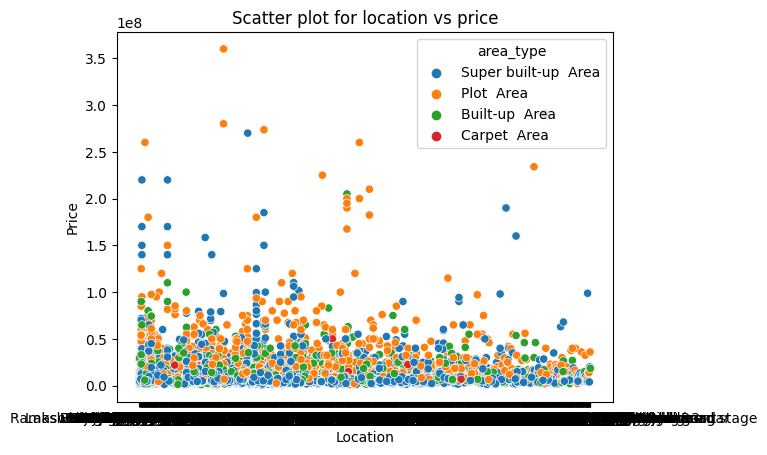

In [80]:
# Scatter plot for location and price
sns.scatterplot(x ='location',y ='price',hue = 'area_type',data = df1)
plt.xlabel('Location')
plt.ylabel('Price')
plt.title('Scatter plot for location and price')
plt.show()

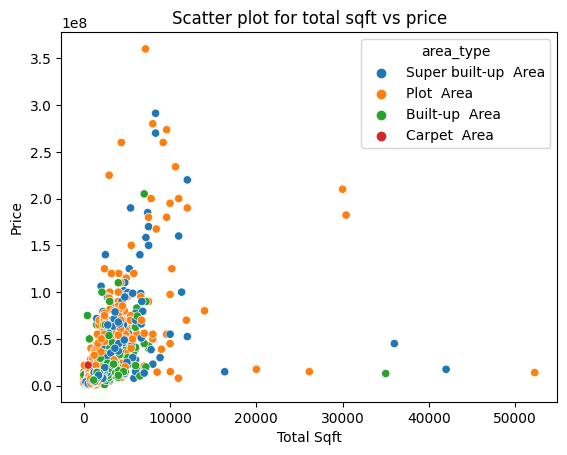

In [81]:
# Scatter plot for Total sqft and price
sns.scatterplot(x ='total_sqft',y ='price',hue = 'area_type',data = df1)
plt.xlabel('Total Sqft')
plt.ylabel('Price')
plt.title('Scatter plot for total sqft and price')
plt.show()

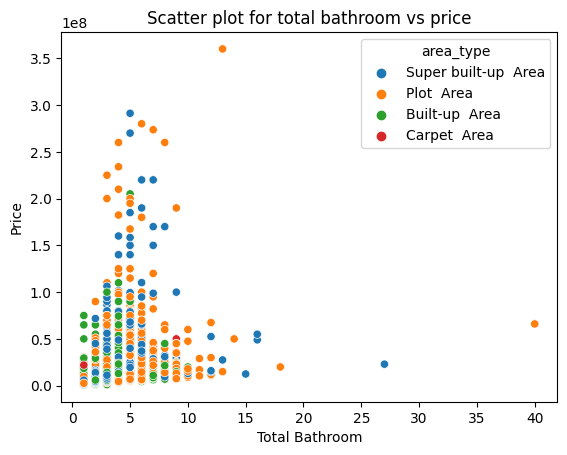

In [82]:
# Scatter plot for Total bathroom and price
sns.scatterplot(x ='bath',y ='price',hue = 'area_type',data = df1)
plt.xlabel('Total Bathroom')
plt.ylabel('Price')
plt.title('Scatter plot for total bathroom and price')
plt.show()

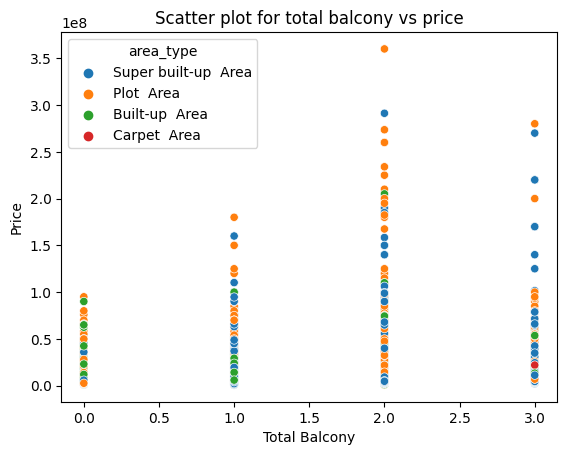

In [83]:
# Scatter plot for Total balcony and price
sns.scatterplot(x ='balcony',y ='price',hue = 'area_type',data = df1)
plt.xlabel('Total Balcony')
plt.ylabel('Price')
plt.title('Scatter plot for total balcony and price')
plt.show()

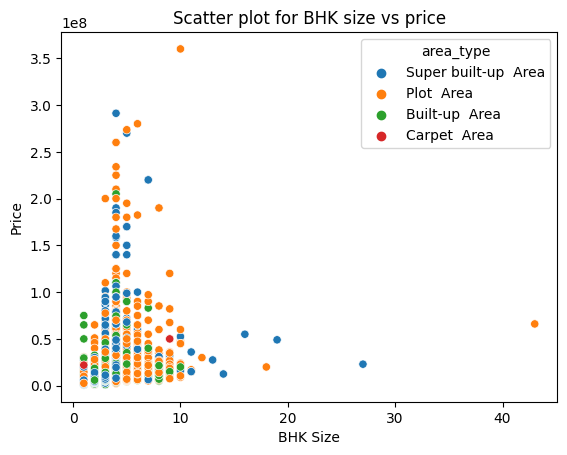

In [84]:
# Scatter plot for BHK Size and price
sns.scatterplot(x ='bhk_size',y ='price',hue = 'area_type',data = df1)
plt.xlabel('BHK Size')
plt.ylabel('Price')
plt.title('Scatter plot for BHK size and price')
plt.show()

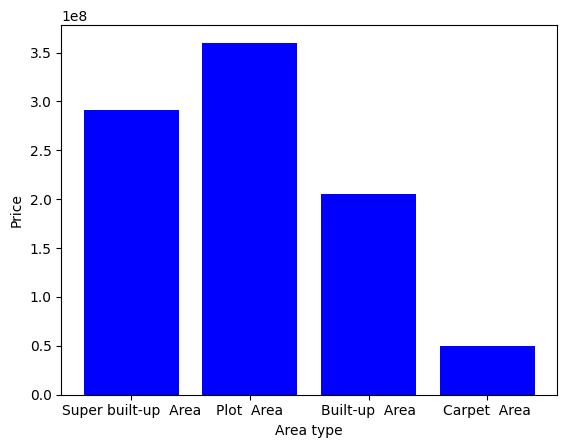

In [85]:
# Bar plot for Area type and price
plt.bar(df1['area_type'],df1['price'],color='b')
plt.xlabel("Area type")
plt.ylabel("Price")
plt.show()

Text(0, 0.5, 'area count')

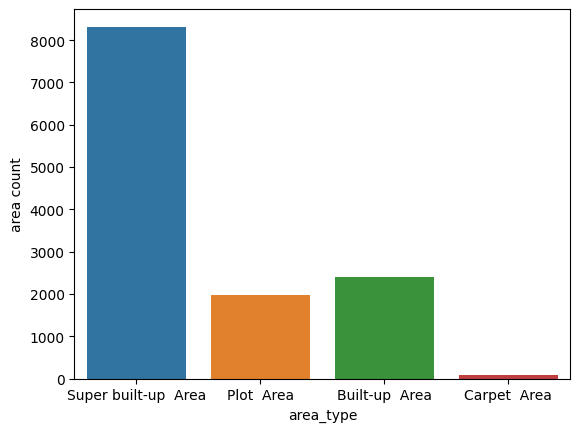

In [86]:
# Count plot of Area type
sns.countplot(x="area_type",data=df1)
plt.ylabel("area count")

<Axes: xlabel='area_type', ylabel='price'>

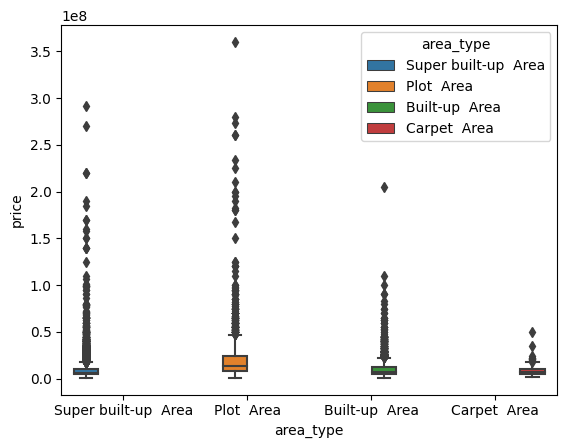

In [87]:
# Boxplot for Area type and Price
sns.boxplot(x="area_type",y="price",data=df1,hue="area_type")

In [88]:
# Droping string data columns to find proper relationship
df2 = df1.drop(['area_type','availability','location'],axis=1)
df2

,total_sqft,bath,balcony,price,bhk_size,price_per_sqft
0,1056.0,2.0,1.0,3907000.0,2,3699.810606
1,2600.0,5.0,3.0,12000000.0,4,4615.384615
2,1440.0,2.0,3.0,6200000.0,3,4305.555556
3,1521.0,3.0,1.0,9500000.0,3,6245.890861
4,1200.0,2.0,1.0,5100000.0,2,4250.000000
...,...,...,...,...,...,...
13314,1715.0,3.0,3.0,11200000.0,3,6530.612245
13315,3453.0,4.0,0.0,23100000.0,5,6689.834926
13316,3600.0,5.0,2.0,40000000.0,4,11111.111111
13317,1141.0,2.0,1.0,6000000.0,2,5258.545136


In [89]:
# Relationship
relation_table = df2.corr()
relation_table

,total_sqft,bath,balcony,price,bhk_size,price_per_sqft
total_sqft,1.000000,0.387009,0.152071,0.573396,0.342823,-0.008566
bath,0.387009,1.000000,0.206901,0.452345,0.897747,0.030638
balcony,0.152071,0.206901,1.000000,0.123589,0.191230,0.009351
price,0.573396,0.452345,0.123589,1.000000,0.394914,0.028130
bhk_size,0.342823,0.897747,0.191230,0.394914,1.000000,0.030708
price_per_sqft,-0.008566,0.030638,0.009351,0.028130,0.030708,1.000000


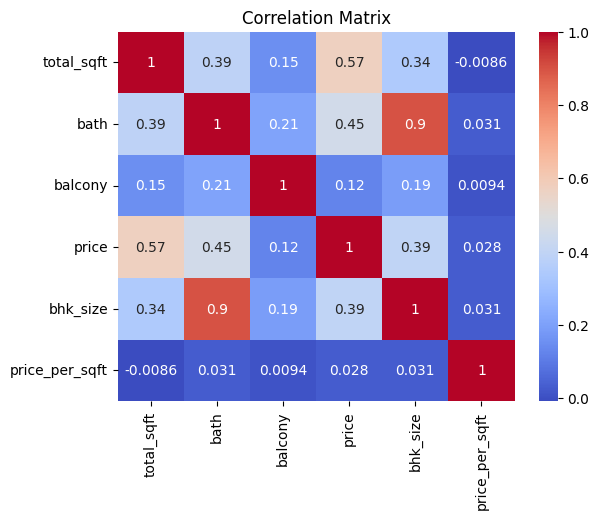

In [90]:
# Visualize relationships using a correlation matrix graph
sns.heatmap(relation_table, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()